# **Exploring How Age, Cholesterol and Resting Blood Pressure Can Classify Heart Disease Patients from Cleveland**  

Gabbi Villarica

# Introduction

This project proposal investigates and analyzes the 1988 UC Irvine Machine Repository dataset on Heart Disease from the Cleveland database. The aim of the dataset was to determine the presence of heart disease in patients and see how various factors contribute to Heart Disease. 

The term Heart Disease encompasses a range of conditions that affect the heart (Mayo Clinic, 2022). Coronary Heart Disease is one type that affects the blood supply to the heart, which, through excess cholesterol buildup or plaque, constricts proper blood flow to the heart and can subsequently lead to a heart attack, stroke, or chest pain (Mayo Clinic, 2022). High blood pressure puts strain on the heart to work harder and pump blood throughout the body causing the lower left ventricle to thicken and grow large which, can increase risk of heart failure (Mayo Clinic, 2023). Moreover, it is common with age for there to be changes to the heart and blood vessels. The heart's main artery, the aorta, becomes thicker and less flexible which causes high blood pressure (MedlinePlus, 2022). 

This project will investigate how the age, cholesterol ("**chol**") and the resting blood pressure of patients when admitted to the hospital (“**trestbps**”) predictors can associate a link to heart disease (“**num**”) presence.


# Preliminary Exploratory Data Analysis

In [10]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.matrix.max.rows = 10)

In [11]:
#set seed to ensure data is reproducible.
set.seed(16)

# read the dataset and write a short description.
cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)

#rename the columns
cleveland_data <- rename(cleveland_data, age = X1, sex = X2, cp = X3, trestbps = X4, chol = X5, fbs = X6, restecg = X7, thalach = X8, exang = X9, oldpeak = X10, slope = X11, ca = X12, thal = X13, num = X14)
cleveland_data

#filter out the unknown values (?) from the data.
cleveland_filtered <- filter(cleveland_data, ca != "?", thalach != "?")

#select the relevant columns (age, chol, trestbps, num)
cleveland_selected <- select(cleveland_filtered, age, chol, trestbps, num) |> 
    arrange(age)

#wrangle the data, set num to either True/False
cleveland_wrangled <- cleveland_selected |>
    mutate(num = as_factor(num)) |>
    mutate(num = fct_recode(num, "False" = "0", "True" = "1", "True" = "2", "True" = "3", "True" = "4"))
cleveland_wrangled

#split dataset into training + testing
cleveland_split <- initial_split(cleveland_wrangled, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


age,chol,trestbps,num
<dbl>,<dbl>,<dbl>,<fct>
29,204,130,False
34,182,118,False
34,210,118,False
35,183,138,False
35,198,120,True
⋮,⋮,⋮,⋮
71,265,110,False
71,149,112,False
74,269,120,False


In [16]:
#summarize data using the mean.

cleveland_summarize <- cleveland_train |>
    group_by(num) |>
    summarize(mean_age = mean(age, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE), mean_trestbps = mean(trestbps, na.rm = TRUE)
              )
cleveland_summarize


num,mean_age,mean_chol,mean_trestbps
<fct>,<dbl>,<dbl>,<dbl>
False,53.38333,244.0333,129.7250
True,56.33981,250.4854,133.9029


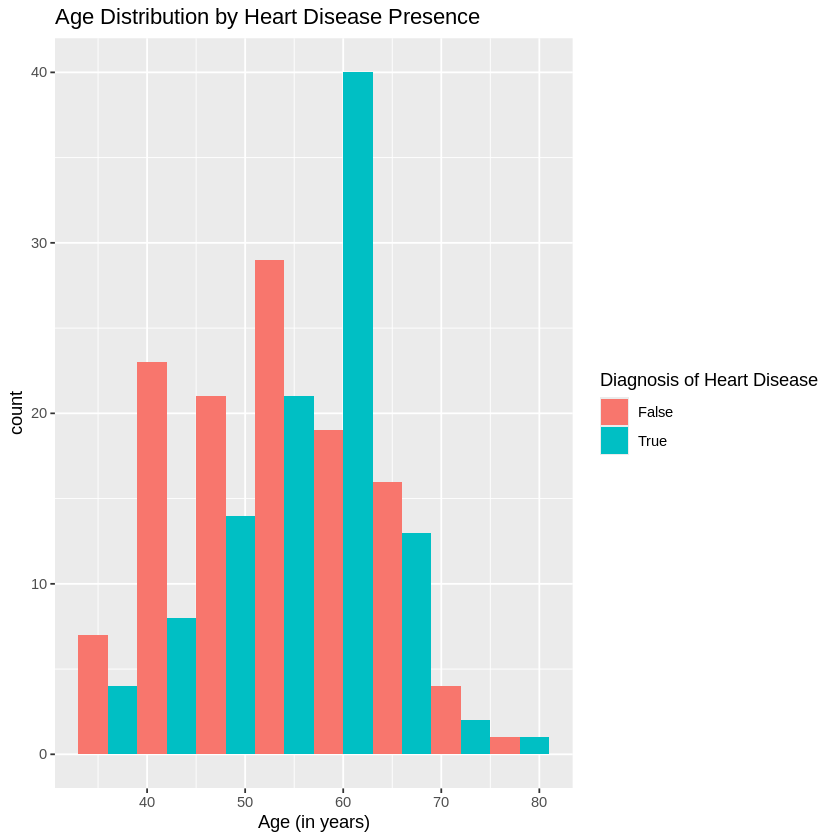

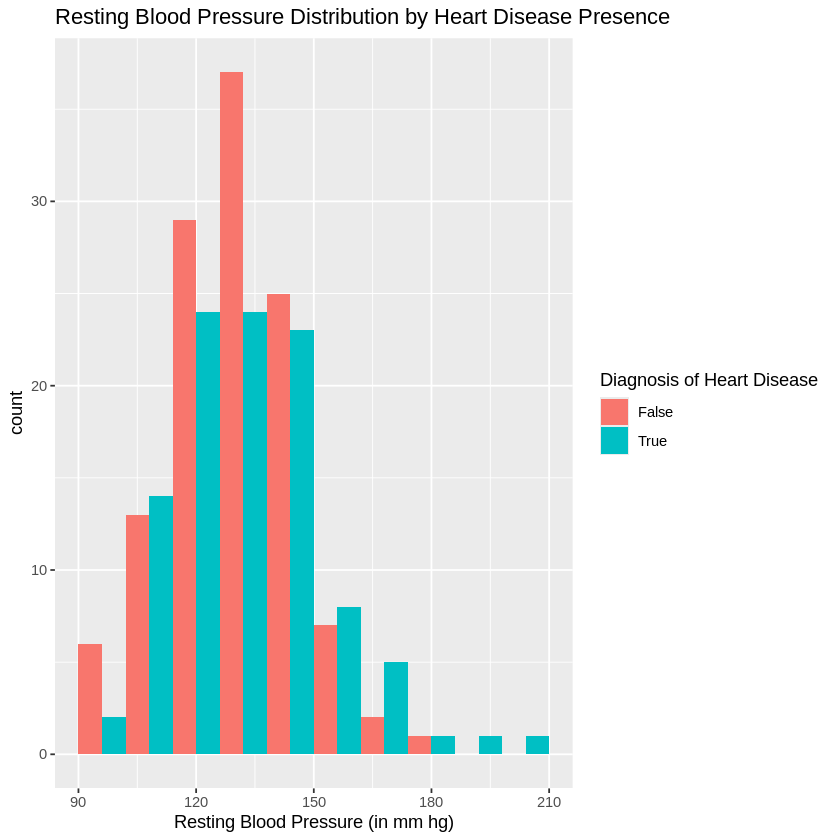

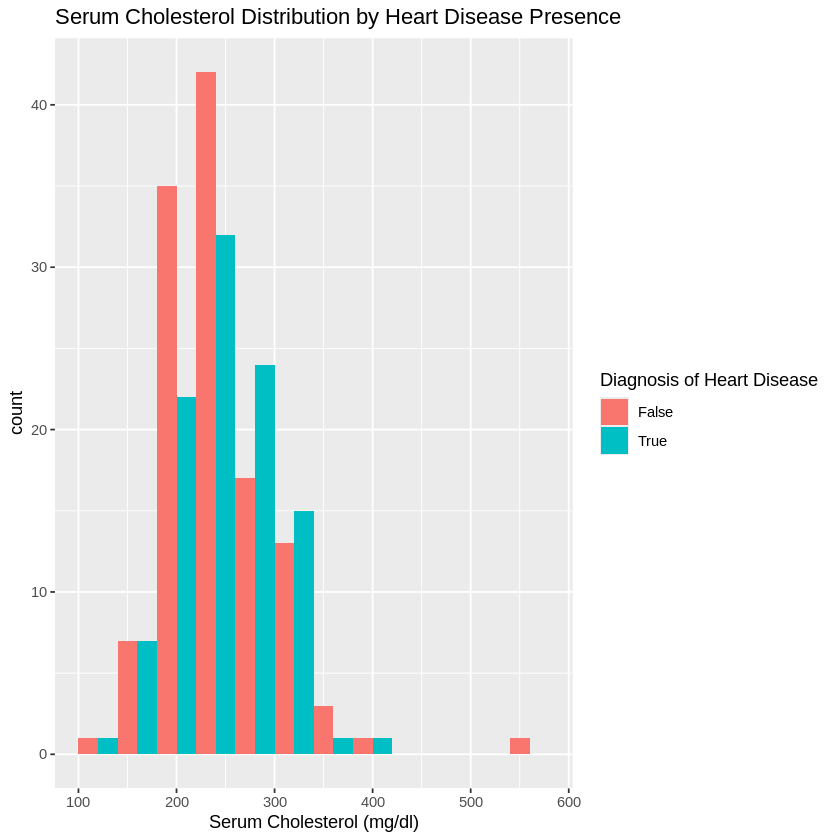

In [17]:
#plot the data using a histogram plot.

cleveland_plot_1 <- ggplot(cleveland_train, aes(x = age, fill = as_factor(num))) + 
    geom_histogram(binwidth = 6, position = "dodge") +
    labs(x = "Age (in years)", fill = "Diagnosis of Heart Disease", 
        title = "Age Distribution by Heart Disease Presence")
cleveland_plot_1

cleveland_plot_2 <- ggplot(cleveland_train, aes(x = trestbps, fill = as_factor(num))) +
    geom_histogram(binwidth = 12, position = "dodge") +
    labs(x = "Resting Blood Pressure (in mm hg)", fill = "Diagnosis of Heart Disease", 
         title = "Resting Blood Pressure Distribution by Heart Disease Presence")
cleveland_plot_2

cleveland_plot_3 <- ggplot(cleveland_train, aes(x = chol, fill = as_factor(num))) +
    geom_histogram(binwidth = 40, position = "dodge") +
    labs(x = "Serum Cholesterol (mg/dl)", fill = "Diagnosis of Heart Disease", 
        title = "Serum Cholesterol Distribution by Heart Disease Presence")
cleveland_plot_3

# Methods

I used the processed.cleveland.data dataset from the Heart Disease database from 1988. The creators noted that the Cleveland database are commonly used by data scientists which influenced my decision to use this data. This dataset is used to predict if a patient based on a multitude of variables, will have heart disease. The columns in the dataset include:
1. Age (**age**) 
2. Sex (**sex**)
3. Chest Pain Type (**cp**)
4. Resting Blood Pressure in mm Hg on admission to the hospital (**trestbps**)
5. Cholesterol (**chol**)
6. Fasting Blood Pressure > 120 mg/dl (**fbs**)
7. Resting Electrocardiographic Results (**restecg**)
8. Maximum Heart Rate Achieved (**thalach**)
9. Exercise Induced Angina (**exang**)
10. ST depression induced by exercise relative to rest (**oldpeak**)
11. The slope of the peak exercise ST segment (**slope**)
12. Number of major vessels colored by fluoroscopy (**ca**) 
13. Maximum heart rate achieved (**thalach**)
14. Diagnosis of heart disease (**num**, 1-4 = heart disease presence, 0 = no presence) 

After reading in the data, I started off by renaming the columns to the column names listed above to easily refer to later in teh analysis. I then started cleaning by filtering all the rows with missing data (?) using the != operator to deselect those rows. I then used the “select” function to extract the relevant columns to my exploratory question and created a new dataframe, “cleveland_selected” which contained the following columns: **age**, **chol**, **trestbps**, and **num** where **age**, **chol** and **trestbps** are my predictors and **num** is the class label variable. As **num** was first classified as an “integer” due to the numerical range it used (0 - 4) to indicate heart disease presence, I decided to transform it to be a factor using the mutate(), as_factor(), and fct_recode() functions to simplify diagnoses to be either “TRUE” (presence of heart disease” or “FALSE” (no presence of heart disease) thus turning num into a categorical, binary variable which sets up my data analysis for classification. 

I then trained and tested my data first by using intial_split() to split the original data set into 75% in the training set and 25% in the testing set and set the strata for num or the class label variable. I only used the training set for my analysis. To summarize my data, I grouped by **num** and used the summarize() function to find the mean of each column (**age**, **trestbps** and **chol**).  

To visualize my data, I used a histogram plot to show the distribution of heart disease (on the y-axis) from each predictor (x-axis) which are all quantitative variables suitable for a histogram. I found that this method would be easier to see how all 3 predictors compare in terms of how often heart disease occurs with each factor isolated visually.



# Expected Outcomes and Significance

Based on existing research and common knowledge, I would expect to find that older patients, those with higher cholesterol levels and higher blood pressure to be significantly more at risk for heart disease. 

These findings can be significant in seeing how various factors, both in isolation and combined with other risk factors, can increase risks for generating heart disease. These findings could also help researchers to work on specific preventative measures or refining or dosings for patients with existing heart disease in specific ranges of each predictor variable. 

These findings can trigger further questions such as: Which combination of all 3 predictor variables will yield a higher risk of generating or worsening heart disease? Is there a specific inflection point/range in each predictor where reversing the effects of heart disease is less likely? 


# References 

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X. 

Mayo Clinic. (2022, August 25). Heart Disease - Symptoms and Causes. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118 

Mayo Clinic. (2023, November 28). How high blood pressure can affect the body. https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868 

MedlinePlus. (2022, July 21). Aging changes in the heart and blood vessels. https://medlineplus.gov/ency/article/004006.htm